In [3]:
# Import the relevant modules
import pandas as pd
import sklearn as sk
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm 
import matplotlib.colors as colors
import matplotlib as mpl

import torch as pt 
import pytorch_lightning as pL
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data_utils
import pytorch_lightning.callbacks as callbacks
import torch_geometric as tg
from torch_geometric.utils import to_networkx

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

import networkx as nx
import plotly.express as px
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
Dataset = pd.read_csv("Stellar_Dataset2.csv")
Dataset.drop(columns = ["SOURCE_ID"], inplace = True)
Dataset.dropna(inplace = True)
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ra                 200000 non-null  float64
 1   dec                200000 non-null  float64
 2   parallax           200000 non-null  float64
 3   pmra               200000 non-null  float64
 4   pmdec              200000 non-null  float64
 5   phot_g_mean_mag    200000 non-null  float64
 6   phot_bp_mean_mag   200000 non-null  float64
 7   phot_rp_mean_mag   200000 non-null  float64
 8   teff_gspphot       200000 non-null  float64
 9   logg_gspphot       200000 non-null  float64
 10  distance_gspphot   200000 non-null  float64
 11  ag_gspphot         200000 non-null  float64
 12  azero_gspphot      200000 non-null  float64
 13  mh_gspphot         200000 non-null  float64
 14  bp_rp              200000 non-null  float64
 15  bp_g               200000 non-null  float64
 16  g_

In [3]:
X = Dataset.drop(columns=["age_flame", "lum_flame", "evolstage_flame"])
y = Dataset[["age_flame", "evolstage_flame", "lum_flame"]]
X.info(), y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ra                 200000 non-null  float64
 1   dec                200000 non-null  float64
 2   parallax           200000 non-null  float64
 3   pmra               200000 non-null  float64
 4   pmdec              200000 non-null  float64
 5   phot_g_mean_mag    200000 non-null  float64
 6   phot_bp_mean_mag   200000 non-null  float64
 7   phot_rp_mean_mag   200000 non-null  float64
 8   teff_gspphot       200000 non-null  float64
 9   logg_gspphot       200000 non-null  float64
 10  distance_gspphot   200000 non-null  float64
 11  ag_gspphot         200000 non-null  float64
 12  azero_gspphot      200000 non-null  float64
 13  mh_gspphot         200000 non-null  float64
 14  bp_rp              200000 non-null  float64
 15  bp_g               200000 non-null  float64
 16  g_

(None, None)

In [4]:
X_Geometric = X[["ra", "dec", "distance_gspphot", "pmra", "pmdec"]]
X_Geometric_Standardized = StandardScaler().fit_transform(X_Geometric)
X_Geometric_Standardized = pd.DataFrame(X_Geometric_Standardized, columns = X_Geometric.columns)
n_clusters = len(X_Geometric_Standardized)//25

kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X_Geometric_Standardized)
X_Geometric_Standardized["cluster"] = kmeans.labels_
X_Geometric_Standardized

c:\Users\kdarn\anaconda3\envs\IsaacRoboFlow\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,ra,dec,distance_gspphot,pmra,pmdec,cluster
0,0.178346,-0.101469,0.693488,-0.475142,-0.512042,4269
1,0.178504,-0.101323,-0.437406,-0.123173,0.479979,4676
2,0.178314,-0.101350,0.468391,-0.027114,0.086553,1475
3,0.178859,-0.100919,-0.600815,-0.227811,-0.152302,3433
4,0.178660,-0.100834,0.265254,-0.703074,-0.216298,4530
...,...,...,...,...,...,...
199995,0.652227,2.948780,-0.964570,0.677931,2.828101,3492
199996,0.655585,2.948724,-0.092282,-1.723272,6.827024,6312
199997,0.601442,0.896581,-0.569484,0.104804,0.022247,830
199998,0.060985,-1.133719,0.014900,0.879583,-0.451183,3364


In [17]:
X_Geometric_Standardized["PM"] = np.sqrt(X_Geometric_Standardized["pmra"]**2 + X_Geometric_Standardized["pmdec"]**2)

C:\Users\kdarn\AppData\Local\Temp\ipykernel_25988\3370013928.py:8: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



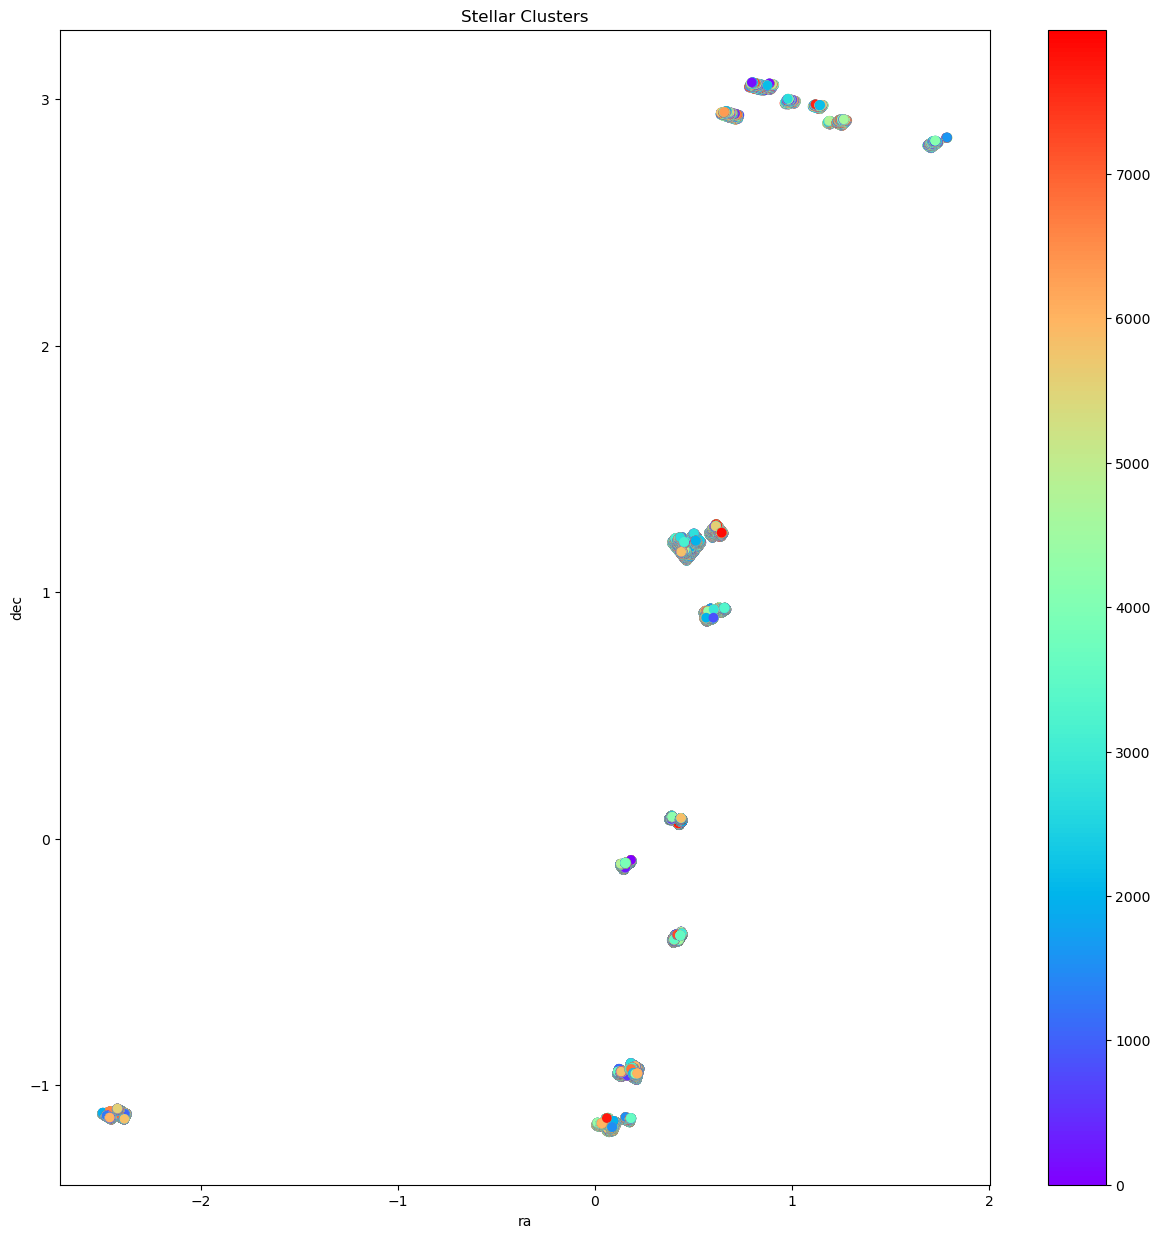

In [18]:
plt.figure(figsize=(15, 15))
plt.scatter(X_Geometric_Standardized["ra"], X_Geometric_Standardized["dec"], c=X_Geometric_Standardized["cluster"], cmap='rainbow')
plt.xlabel("ra")
plt.ylabel("dec")
plt.title("Stellar Clusters")
colorbar = plt.cm.ScalarMappable(cmap='rainbow')
colorbar.set_array(X_Geometric_Standardized["cluster"])
plt.colorbar(colorbar)
plt.show()

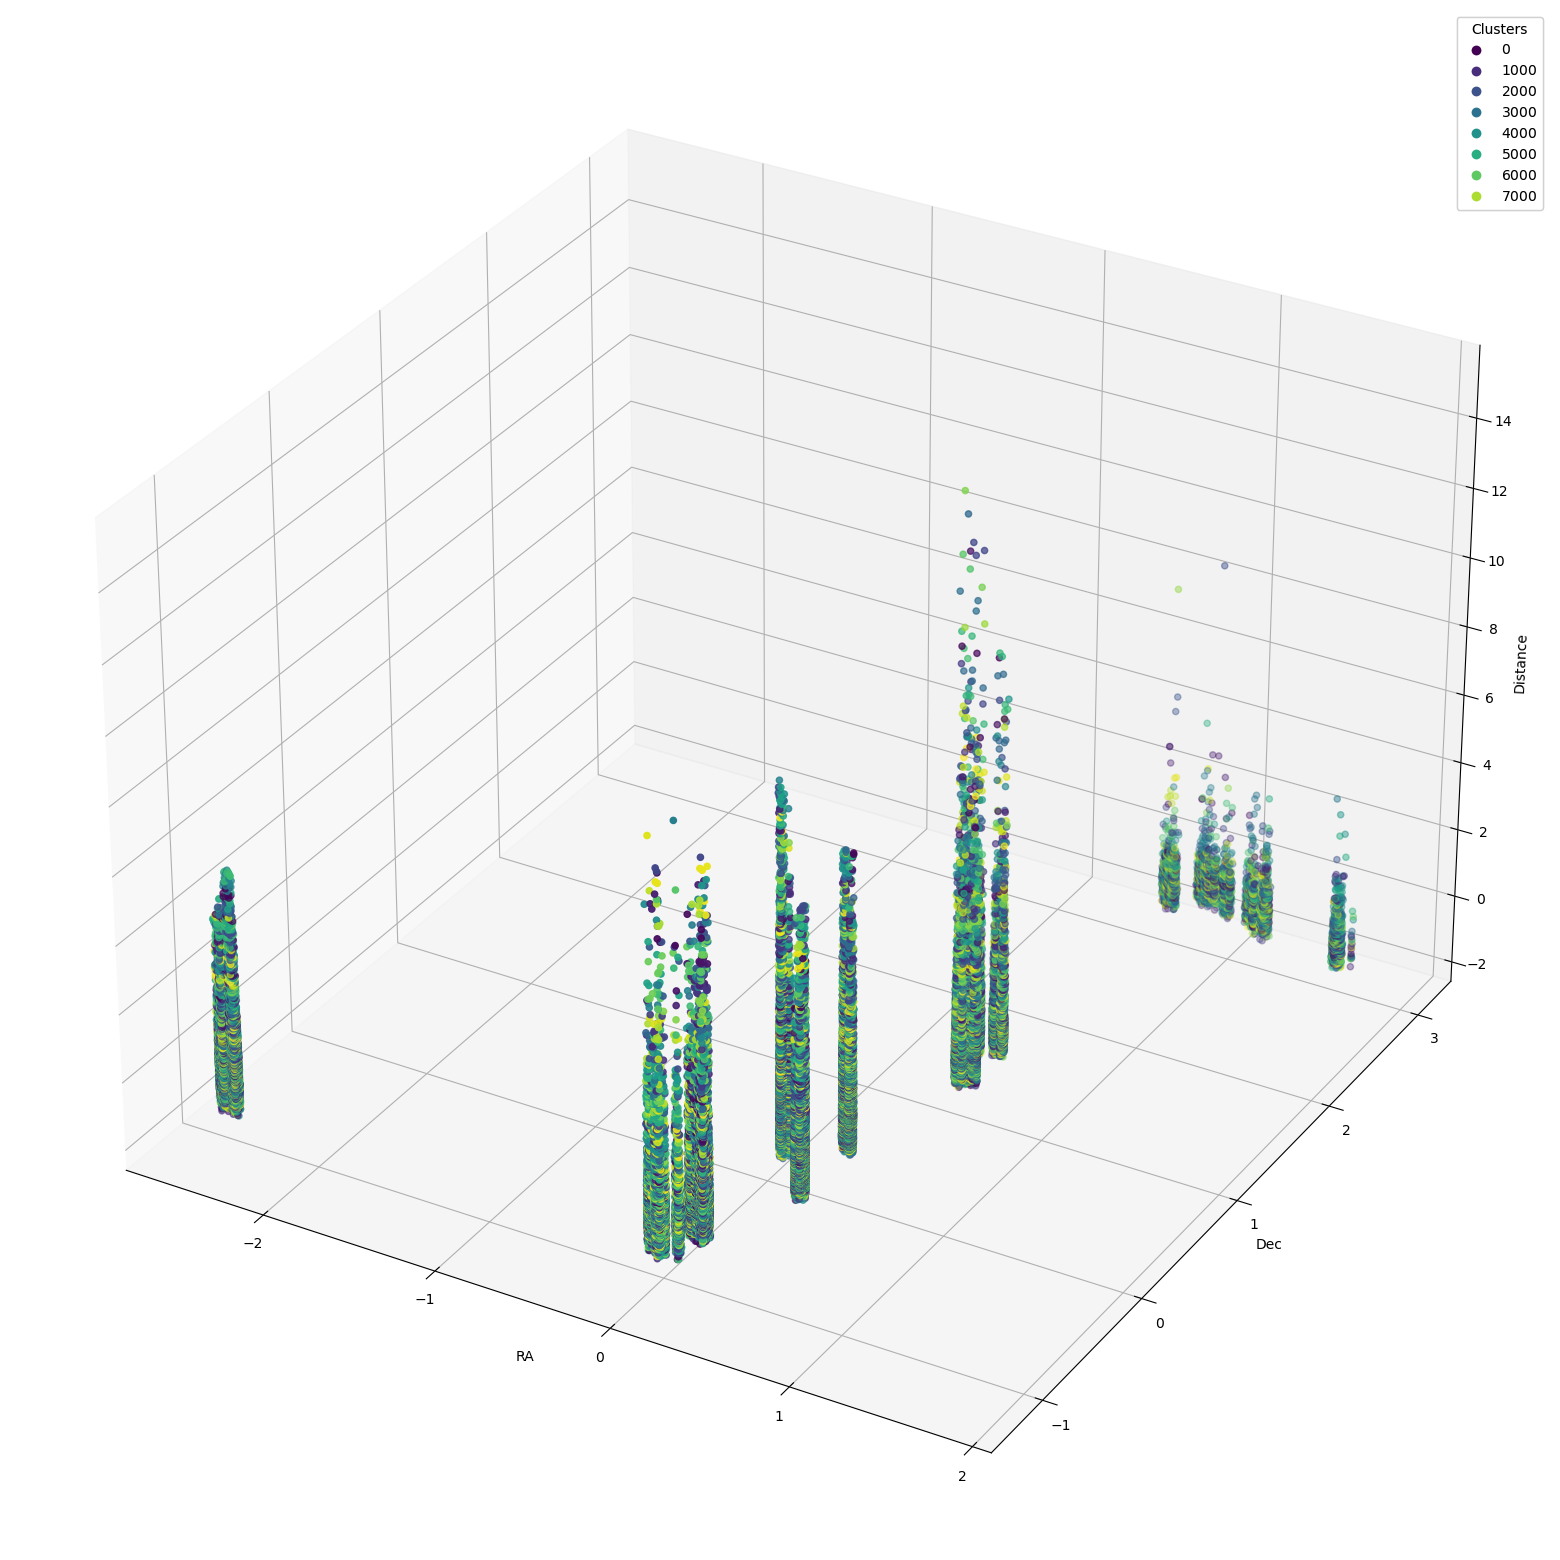

In [19]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_Geometric_Standardized['ra'], X_Geometric_Standardized['dec'], X_Geometric_Standardized['distance_gspphot'], c=X_Geometric_Standardized['cluster'], cmap='viridis')
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
ax.set_zlabel('Distance')
plt.show()


In [20]:
fig = px.scatter_3d(x = X_Geometric_Standardized['ra'], y=  X_Geometric_Standardized['dec'], z = X_Geometric_Standardized['distance_gspphot'], color=X_Geometric_Standardized['cluster'])
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
ax.set_zlabel('Distance')
fig.show()

In [ ]:
plt.figure(figsize=(15, 15))
cluster_num = 10
fig = px.scatter_3d(x = X_Geometric_Standardized.query(f"cluster == {cluster_num}")["ra"],y = X_Geometric_Standardized.query(f"cluster == {cluster_num}")["dec"], z = X_Geometric_Standardized.query(f"cluster == {cluster_num}")["distance_gspphot"],  color=X_Geometric_Standardized.query(f"cluster == {cluster_num}")["PM"])
fig.update_layout(title = f"Cluster {cluster_num}", scene = dict(xaxis_title='RA', yaxis_title='Dec', zaxis_title='Distance'), margin=dict(l=0, r=0, b=0, t=0))
fig.show()

<Figure size 1500x1500 with 0 Axes>

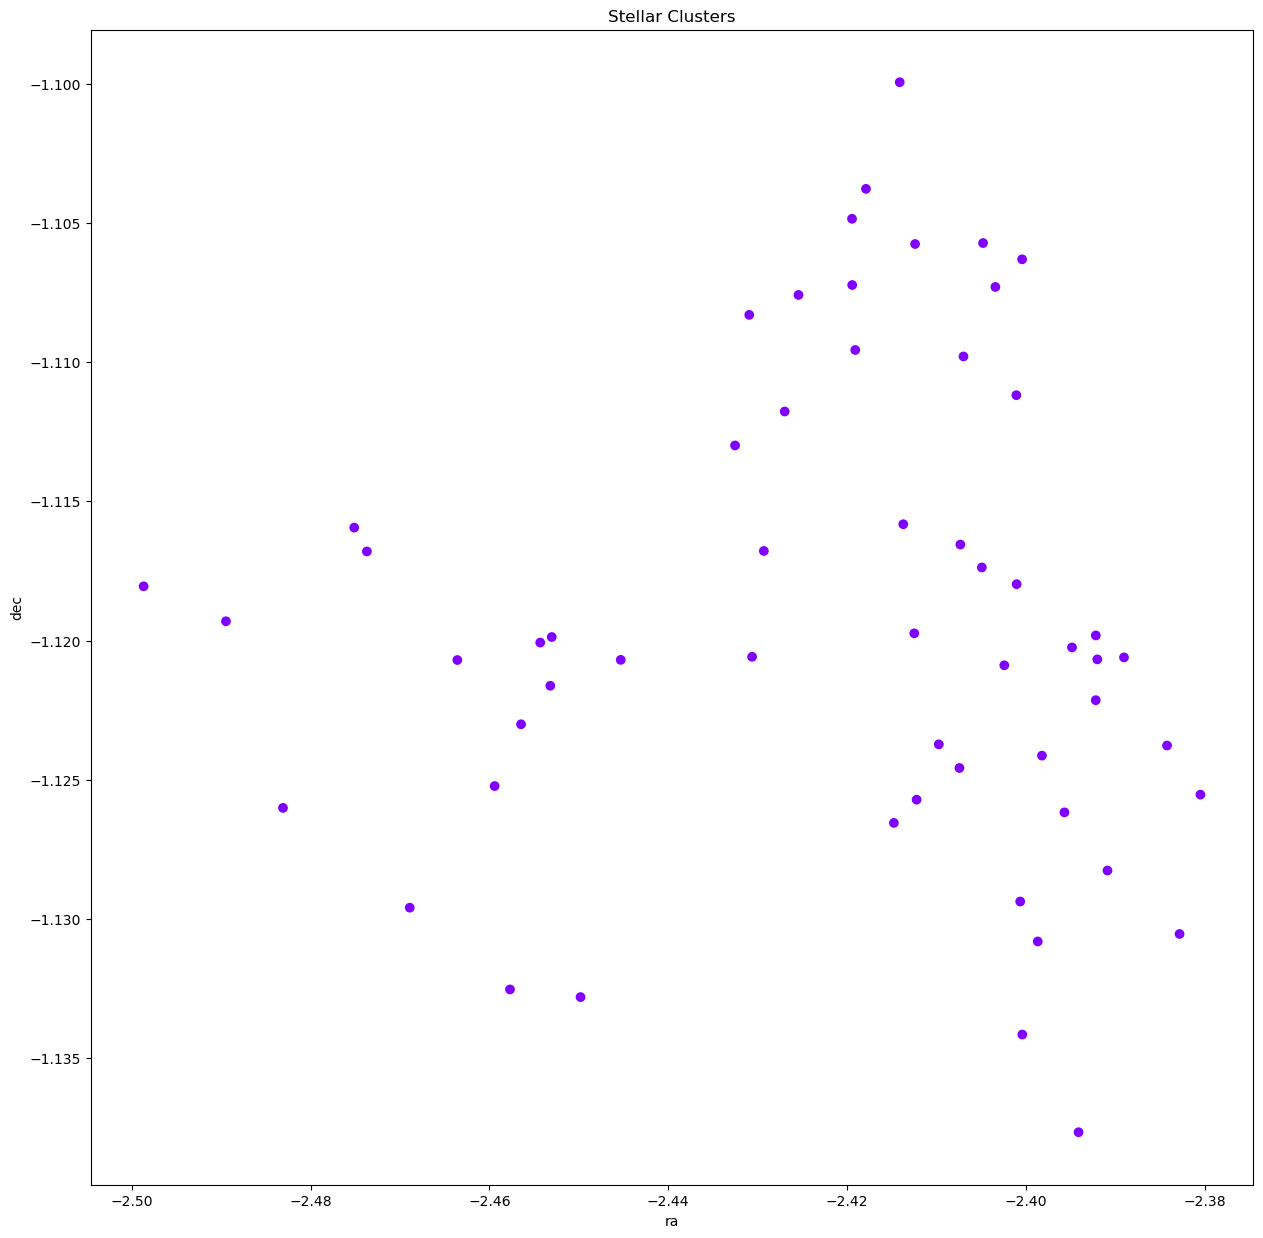

In [10]:
plt.figure(figsize=(15, 15))
cluster_num = 100
plt.scatter(X_Geometric_Standardized.query(f"cluster == {cluster_num}")["ra"], X_Geometric_Standardized.query(f"cluster == {cluster_num}")["dec"], c=X_Geometric_Standardized.query(f"cluster == {cluster_num}")["cluster"], cmap='rainbow')
plt.xlabel("ra")
plt.ylabel("dec")
#plt.xlim([X_Geometric_Standardized.min()["ra"], X_Geometric_Standardized.max()["ra"]*1.2])
#plt.ylim([X_Geometric_Standardized.min()["dec"], X_Geometric_Standardized.max()["dec"]*1.2])
plt.title("Stellar Clusters")
plt.show()

In [11]:
def knn_graph_generator(cluster_data, k):
    G = nx.Graph()
    neighbors = NearestNeighbors(n_neighbors=k, metric='euclidean', algorithm = "ball_tree").fit(cluster_data)
    distances, indices = neighbors.kneighbors(cluster_data)
    for i in range(len(cluster_data)):
        for j in range(1, k):
            G.add_edge(i, indices[i][j])

    return G

def nx_to_tg_data(G, features, targets):
    edge_index = pt.tensor(list(G.edges)).t().contiguous()
    x = pt.tensor(features.values).float()
    y = pt.tensor(targets.values).float()
    data = tg.data.Data(x=x, y = y, edge_index=edge_index)
    return data

def visualize_graph(data):
    G = to_networkx(data, to_undirected=True)
    pos = nx.spring_layout(G)
    plt.figure()
    edge_colors = np.array(list(range(data.edge_index.shape[1])))
    cmap = plt.cm.hot

    nx.draw_networkx_nodes(G, pos, node_size=50, node_color='blue')
    edges = nx.draw_networkx_edges(
        G,
        pos,
        edge_color=edge_colors,
        edge_cmap=cmap,
        alpha = 0.8,
        arrowsize = 10,
        width = 2,
    )
    pc = edges
    pc.set_array(edge_colors)

    ax = plt.gca()
    ax.set_axis_off()
    plt.colorbar(pc, ax=ax)
    plt.show()

In [65]:
X_Geometric_Standardized.cluster.unique()

array([4269, 4676, 1475, ..., 7098, 4010, 6312])

In [66]:
y.iloc[cluster_data.index]

,age_flame,lum_flame,evolstage_flame
661,12.739399,4.982959,665
934,9.722122,3.258615,505
998,11.852847,8.151175,733
1526,7.750533,3.109902,482
1934,11.700231,3.749004,616
2859,4.508983,4.374883,518
3010,11.025767,5.753003,686
3375,12.653358,3.199396,587
3755,11.774142,3.795501,613
3791,11.776714,3.488167,598


In [12]:
X_Standardised = pd.DataFrame(StandardScaler().fit_transform(X), columns = X.columns)
cluster_num = 1
neighbors_lim = 8
Graph_Dataset = []
while cluster_num <= X_Geometric_Standardized.cluster.max():
    cluster_data = X_Geometric_Standardized.query(f"cluster == {cluster_num}")
    cluster_features = X_Standardised.iloc[cluster_data.index]
    cluster_targets = y.iloc[cluster_data.index]
    neighbors = min(len(cluster_data), neighbors_lim)
    G = knn_graph_generator(cluster_data, k = neighbors)
    tg_data = nx_to_tg_data(G, cluster_features, cluster_targets)
    if len(tg_data.x) > 5:
        Graph_Dataset.append(tg_data)
    cluster_num += 1
Graph_Dataset

[Data(x=[58, 22], edge_index=[2, 250], y=[58, 3]),
 Data(x=[124, 22], edge_index=[2, 545], y=[124, 3]),
 Data(x=[16, 22], edge_index=[2, 69], y=[16, 3]),
 Data(x=[12, 22], edge_index=[2, 49], y=[12, 3]),
 Data(x=[30, 22], edge_index=[2, 122], y=[30, 3]),
 Data(x=[56, 22], edge_index=[2, 252], y=[56, 3]),
 Data(x=[55, 22], edge_index=[2, 247], y=[55, 3]),
 Data(x=[41, 22], edge_index=[2, 178], y=[41, 3]),
 Data(x=[68, 22], edge_index=[2, 298], y=[68, 3]),
 Data(x=[58, 22], edge_index=[2, 271], y=[58, 3]),
 Data(x=[48, 22], edge_index=[2, 237], y=[48, 3]),
 Data(x=[45, 22], edge_index=[2, 201], y=[45, 3]),
 Data(x=[6, 22], edge_index=[2, 15], y=[6, 3]),
 Data(x=[6, 22], edge_index=[2, 15], y=[6, 3]),
 Data(x=[55, 22], edge_index=[2, 242], y=[55, 3]),
 Data(x=[15, 22], edge_index=[2, 67], y=[15, 3]),
 Data(x=[13, 22], edge_index=[2, 56], y=[13, 3]),
 Data(x=[59, 22], edge_index=[2, 252], y=[59, 3]),
 Data(x=[64, 22], edge_index=[2, 289], y=[64, 3]),
 Data(x=[19, 22], edge_index=[2, 84], y

69


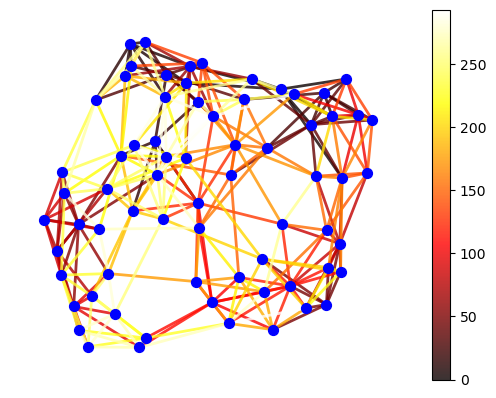

In [13]:
data = Graph_Dataset[150]
print(len(data.x))
visualize_graph(data)

23


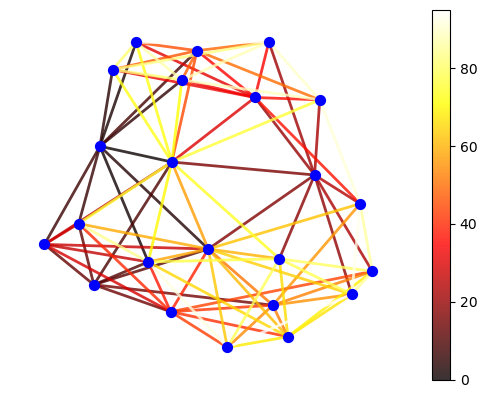

In [14]:
data = Graph_Dataset[50]
print(len(data.x))
visualize_graph(data)

In [15]:
len(Graph_Dataset)

6550

In [16]:
data.x.shape

torch.Size([23, 22])

In [94]:
import torch
from torch_geometric.data import InMemoryDataset, Data

class StellarGraphDataset(InMemoryDataset):
    def __init__(self, root, data_list, transform=None, pre_transform=None):
        super(StellarGraphDataset, self).__init__(root, transform, pre_transform)
        self.graph_data_list = data_list
        self.data, self.slices = torch.load(self.processed_paths[0])

    @property
    def raw_file_names(self):
        return []

    @property
    def processed_file_names(self):
        return ['data.pt']

    def download(self):
        pass

    def process(self):
        if self.graph_data_list is not None:
            data_list = self.graph_data_list
            data, slices = self.collate(data_list)
            torch.save((data, slices), self.processed_paths[0])

# Assuming graph_data_list is your list of torch_geometric.data.Data objects
class StellarGraphDataset(InMemoryDataset):
    def __init__(self, root, data_list=None, transform=None, pre_transform=None):
        self.data_list = data_list
        super(StellarGraphDataset, self).__init__(root, transform, pre_transform)
        self.data, self.slices = torch.load(self.processed_paths[0])

    @property
    def raw_file_names(self):
        return []

    @property
    def processed_file_names(self):
        return ['data.pt']

    def download(self):
        pass

    def process(self):
        if self.data_list is not None:
            data, slices = self.collate(self.data_list)
            torch.save((data, slices), self.processed_paths[0])

# Save the dataset
dataset = StellarGraphDataset(root= r"C:\Users\kdarn\OneDrive\Documents\Life's Portfolio\Projects\Machine Learning Personal Projects\StellarRegression", data_list=Graph_Dataset)
Loaded_Dataset = StellarGraphDataset(root= r"C:\Users\kdarn\OneDrive\Documents\Life's Portfolio\Projects\Machine Learning Personal Projects\StellarRegression")